In [2]:
import math
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import cv2

In [3]:
img_wdg = cv2.imread("sonnet.png")
img_grey = cv2.cvtColor(img_wdg,cv2.COLOR_BGR2GRAY)

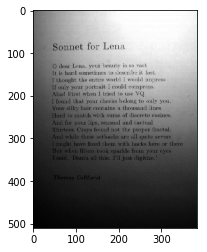

In [4]:
plt.imshow(img_grey,'gray')
plt.show()

In [5]:
def Hist(img):
    row, col = img.shape 
    y = np.zeros(256)
    for i in range(0,row):
        for j in range(0,col):
             y[img[i,j]] += 1
    x = np.arange(0,256)
    plt.bar(x, y, color='b', width=1, align='center', alpha=0.25)
    plt.show()
    return y

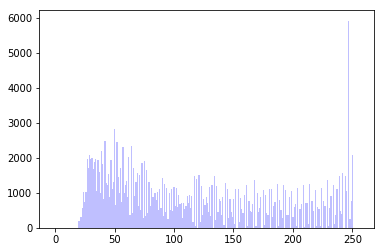

In [6]:
y = Hist(img_grey)

In [7]:
total = y.sum()
y_pro = y/total

In [8]:
cumulative1 = np.array([y_pro[:j].sum() for j in range(len(y_pro))])
mean1 = [(y_pro[:j]*y[:j]).sum() for j in range(len(y_pro))]

In [9]:
mean1 = np.array(mean1)/cumulative1
mean1[np.isnan(mean1)] = 0

/Users/dengwenlong/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [10]:
cumulative2 = np.ones(cumulative1.shape) - cumulative1

In [11]:
mean2 = np.array([(y*y_pro).sum()-(y_pro[:j]*y[:j]).sum() for j in range(len(y_pro))])
mean2 = mean2/cumulative2
mean2[np.isinf(mean2)] = 0

/Users/dengwenlong/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [12]:
cumulative2 = np.ones(len(cumulative1)) - cumulative1

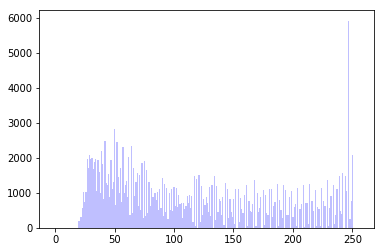

/Users/dengwenlong/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars


optimal threshold132


In [13]:

threshold_values = {}
h = [1]





def regenerate_img(img, threshold):
    row, col = img.shape 
    y = np.zeros((row, col))
    for i in range(0,row):
        for j in range(0,col):
            if img[i,j] >= threshold:
                y[i,j] = 255
            else:
                y[i,j] = 0
    return y
   
def countPixel(h):
    cnt = 0
    for i in range(0, len(h)):
        if h[i]>0:
            cnt += h[i]
    return cnt


def wieght(s, e):
    w = 0
    for i in range(s, e):
        w += h[i]
    return w


def mean(s, e):
    m = 0
    w = wieght(s, e)
    for i in range(s, e):
        m += h[i] * i
    
    return m/float(w)


def variance(s, e):
    v = 0
    m = mean(s, e)
    w = wieght(s, e)
    for i in range(s, e):
        v += ((i - m) **2) * h[i]
    v /= w
    return v
            

def threshold(h):
    cnt = countPixel(h)
    for i in range(1, len(h)):
        vb = variance(0, i)
        wb = wieght(0, i) / float(cnt)
        mb = mean(0, i)
        
        vf = variance(i, len(h))
        wf = wieght(i, len(h)) / float(cnt)
        mf = mean(i, len(h))
        
        V2w = wb * (vb) + wf * (vf)
        V2b = wb * wf * (mb - mf)**2
        
        fw = open("trace.txt", "a")

        if not math.isnan(V2w):
            threshold_values[i] = V2b


def get_optimal_threshold():
    max_V2b = max(threshold_values.values())
    optimal_threshold = [k for k, v in threshold_values.items() if v == max_V2b]
    print ('optimal threshold' + str(optimal_threshold[0]))
    return optimal_threshold[0]


image = img_grey
img = np.asarray(image)

h = Hist(img)
threshold(h)
op_thres = get_optimal_threshold()

res = regenerate_img(img, op_thres)
plt.imshow(res,'gray')
plt.savefig("otsu.jpg")

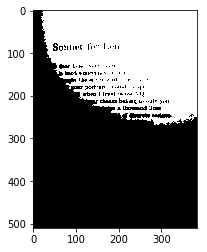

In [14]:
plt.show()

Histograms do not account for neighborhood relationships.
• Thresholds are hard to find.
• Some edges can have gray levels on both sides that belong to the same histogram peak.

adaptive filter

In [263]:
blur = cv2.blur(img_grey,(20,20))

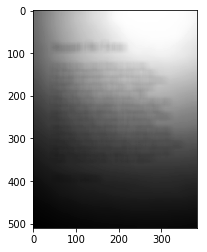

In [264]:
plt.imshow(blur,'gray')
plt.show()

In [305]:
sub_img = blur.astype(int) - img_grey.astype(int)

In [306]:
threshold = 8
sub_img = sub_img - threshold

In [307]:
mask = np.zeros(blur.shape)

In [308]:
mask[sub_img>=0] = 1

In [309]:
img_new = 256 - mask*img_grey


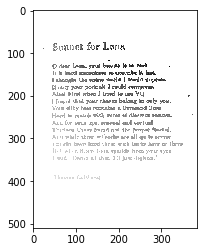

In [310]:
plt.imshow(img_new,'gray')
plt.show()

 Examine statistically pixel values in local neighborhood around pixel to be thresholded.
• Use local statistic as threshold.
• Possibilities include mean, median, or mean of max and min value.

In [321]:
img_wdg = cv2.imread("superpix.jpg")
img_grey = cv2.cvtColor(img_wdg,cv2.COLOR_BGR2GRAY)

In [322]:
mask_sup = np.zeros(img_grey.shape)

In [328]:
sz = 30
diff = 30
x,y = img_grey.shape
superCount = 1
for i in range(x):
    for j in range(y):
        if mask_sup[i,j] ==0:
            mask_sup[i,j] = superCount
            for q in range(x):
                for p in range(y):
                    if mask_sup[q,p] ==0 and np.abs(img_grey[i,j]-img_grey[q,p])< diff:
                        if (i-q)**2+(j-p)**2 < sz**2:
                            mask_sup[q,p] = superCount
            superCount +=1
                        
            

/Users/dengwenlong/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()


In [329]:
mask_sup

array([[  1.,   1.,   1., ...,  26.,  26.,  26.],
       [  1.,   1.,   1., ...,  26.,  26.,  26.],
       [  1.,   1.,   1., ...,  27.,  27.,  26.],
       ...,
       [803., 803., 803., ..., 808., 808., 808.],
       [803., 803., 803., ..., 808., 808., 808.],
       [803., 803., 803., ..., 808., 808., 808.]])

In [333]:
plt.imshow(mask_sup,'gray')

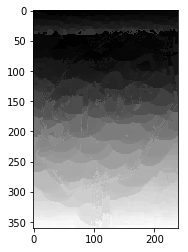

In [334]:
plt.show()